In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [1]:
%run funkcje.ipynb

In [2]:
# x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
# #x = np.array([5, 15, 25, 35, 45, 55])
# y = np.array([5, 20, 14, 32, 22, 38])

# model = LinearRegression(fit_intercept = True).fit(x, y)

# r_sq = model.score(x, y)
# print('coefficient of determination:', r_sq)
# print('intercept:', model.intercept_)
# print('slope:', model.coef_[0])
# y_pred = model.predict(x)
# print('predicted response:', y_pred, sep='\n')

# plt.plot(x, y, 'bo', markersize=3)
# plt.plot(x, y_pred, color='red')

[5.87187269 0.17009801]
predicted response:
[ 8.33333333 13.73333333 19.13333333 24.53333333 29.93333333 35.33333333
 41.81333333]
coefficient of determination: 0.7158756137479543
adjusted coefficient of determination: 0.6448445171849428
regression coefficients (intercept, slope): [5.63333333 0.54      ]
[[ 1.  5.]
 [ 1. 15.]
 [ 1. 25.]
 [ 1. 35.]
 [ 1. 45.]
 [ 1. 55.]
 [ 1. 67.]]


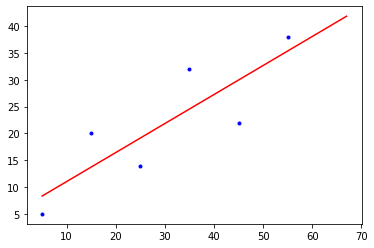

In [3]:
x = np.array([5, 15, 25, 35, 45, 55, 67])
y = np.array([5, 20, 14, 32, 22, 38, float("NaN")])
idx = np.isnan(y)
x = sm.add_constant(x) #comment to not include intercept
model = sm.OLS(y[~idx],x[~idx])
results = model.fit()
# results.summary()

print(results.bse)

print('predicted response:', results.predict(x), sep='\n')
print('coefficient of determination:', results.rsquared)
print('adjusted coefficient of determination:', results.rsquared_adj)
print('regression coefficients (intercept, slope):', results.params)
print(x)

plt.plot(x[:,1], y, 'bo', markersize=3)
plt.plot(x[:,1], results.predict(x), color='red')

In [4]:
x
print(x[1])

[ 1. 15.]


In [5]:
def fit_n_plot_linlin_scipy(x, y, title, xscale_tabel, yscale_label):

    plt.plot(x, y, 'bo', markersize=3)
    plt.title(title)
    plt.xlabel(xscale_tabel)
    plt.ylabel(yscale_label)
    #plt.xscale("log")

    idx = np.isnan(y)
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(x[~idx],y[~idx])
    plt.plot(x, slope * x + intercept, color='red')
    return slope, intercept, r_value, p_value, std_err

In [6]:
# dopasowanko prostej w skali log-log i wyplotowanie

def fit_n_plot_loglog_scipy(x, y, title, xscale_label, yscale_label):

    plt.plot(x, y, 'bo', markersize=3)
    plt.title(title)
    plt.yscale("log")
    plt.xscale("log")
    plt.xlabel(xscale_label)
    plt.ylabel(yscale_label)

    idx = np.isnan(y)
    xlog = np.log10(x)
    ylog = np.log10(y)
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(xlog[~idx],ylog[~idx])
    plt.plot(x, pow(x, slope) * pow(10, intercept), color='red')
    return slope, intercept, r_value, p_value, std_err

In [7]:
x = np.array(range(1, 21), dtype='float64')
y = x+3
rng = np.random.default_rng()
y += 4 * rng.random(20)

(1.0104103581751251,
 5.144095172240721,
 0.9820061210619387,
 1.7596614396827778e-14,
 0.04579965801347775)

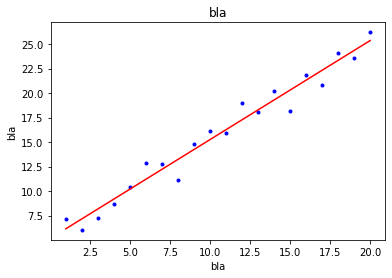

In [8]:
fit_n_plot_linlin_scipy(x, y, 'bla', 'bla', 'bla')

(0.5154466391411165,
 0.6872094030739944,
 0.9521818188521569,
 1.0431922275289915e-10,
 0.038983805656452465)

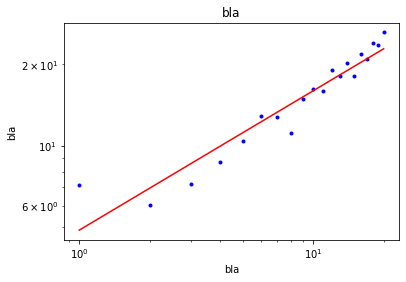

In [9]:
fit_n_plot_loglog_scipy(x, y, 'bla', 'bla', 'bla')

In [10]:
a = 1
b = 2
c = float("NaN")
print(np.mean((a, b, c)))

nan


In [11]:
numbers = [1, 2, 3, 7, 9]
window_size = 3

numbers_series = pd.Series(numbers)
windows = numbers_series.rolling(window_size, center=True)
moving_averages = windows.mean()

moving_averages_list = moving_averages.tolist()
without_nans = moving_averages_list[window_size - 1:]
print(moving_averages)
print(moving_averages_list)
print(without_nans)

0         NaN
1    2.000000
2    4.000000
3    6.333333
4         NaN
dtype: float64
[nan, 2.0, 4.0, 6.333333333333333, nan]
[4.0, 6.333333333333333, nan]


In [12]:
def fit_n_plot_lin_n_log_statsmodels(x, y, title, xscale_label, yscale_label):
    
    idx = np.isnan(y)
    y = y[~idx]
    x = x[~idx]
    plt.plot(x, y, 'bo', markersize=3, label='dane')
    plt.title(title)
    plt.yscale("log")
    plt.xscale("log")
    plt.xlabel(xscale_label)
    plt.ylabel(yscale_label)
    
    #x = sm.add_constant(x[~idx]) #comment to not include intercept
    model1 = sm.OLS(y,x)
    results1 = model1.fit()
    plt.plot(x, results1.predict(x), color='red', label='liniowa, $R^2 = $'+"{:.2f}".format(results1.rsquared))
    
    xlog = np.log10(x)
    ylog = np.log10(y)
    x = sm.add_constant(x)
    xlog = sm.add_constant(xlog)
    
    model2 = sm.OLS(ylog,xlog)
    results2 = model2.fit()
    y_pred2 = pow(10, results2.predict(xlog))
    
    plt.plot(x.loc[:, x.columns != 'const'], pow(10, results2.predict(xlog)), color='black', label='log, $R^2 = $'+"{:.2f}".format(results2.rsquared)+', a = '+ "{:.2f}".format(results2.params[1]))
    plt.legend()
    
    # edit returns
    return results2.params[1], results2.params[0], results2.bse[1], results2.rsquared, results2.rsquared_adj, results2.pvalues[0]

8.0
7.0
2.0958166237612903
0.05380794063551247
S_lin = 4.392447320434173
S_log = 0.0028952944754348335


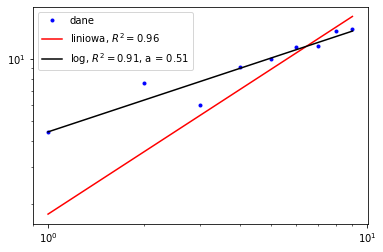

In [14]:
x = np.array(range(1, 10), dtype='float64')
y = x+3
rng = np.random.default_rng()
y += 4 * rng.random(9)

plt.plot(x, y, 'bo', markersize=3, label='dane')
plt.yscale("log")
plt.xscale("log")

#x = sm.add_constant(x[~idx]) #comment to not include intercept
model1 = sm.OLS(y,x)
results1 = model1.fit()
plt.plot(x, results1.predict(x), color='red', label='liniowa, $R^2 = $'+"{:.2f}".format(results1.rsquared))

xlog = np.log10(x)
ylog = np.log10(y)
x = sm.add_constant(x)
xlog = sm.add_constant(xlog)

model2 = sm.OLS(ylog,xlog)
results2 = model2.fit()
y_pred2 = pow(10, results2.predict(xlog))

plt.plot(x[:, 1], pow(10, results2.predict(xlog)), color='black', label='log, $R^2 = $'+"{:.2f}".format(results2.rsquared)+', a = '+ "{:.2f}".format(results2.params[1]))
plt.legend()

# print(results1.resid)
# print(results2.resid)

print(results1.df_resid)
print(results2.df_resid)

print((results1.ssr/results1.df_resid)**(1/2))
print((results2.ssr/results2.df_resid)**(1/2))




# edit returns
#return results2.params[1], results2.params[0], results2.bse[1], results2.rsquared, results2.rsquared_adj, results2.pvalues[0]
